In [2]:
import networkx as nx

def parse_coords(coord_str):
    x, y = coord_str.split()
    return int(x), int(y)

G = nx.DiGraph()
with open("ibm02.txt") as f:
    for line in f:
        if line.startswith("net"):
            # Start of a new net, get number of pins
            parts = line.split()
            line_id_start = f"{parts[0][3:]}-{parts[1]}"
            num_pins = int(parts[2])
            # Collect all pin coordinates for this net
            pins = [tuple(map(int, next(f).split())) for _ in range(num_pins)]
            # Connect all pins in this net as a clique
            for i in range(len(pins)):
                for j in range(i+1, len(pins)):
                    G.add_edge(pins[i], pins[j])


In [33]:
import networkx as nx

def parse_coords(coord_str):
    x, y = coord_str.split()
    return int(x), int(y)

G = nx.DiGraph()

with open("ibm01.txt") as f:
    for line in f:
        if line.startswith("net"):
            # Parse the net header line
            parts = line.split()
            line_id_start = f"{parts[0][3:]}-{parts[1]}"  # e.g., "10130-0"
            num_pins = int(parts[2])

            # Read all pin coordinates and create labeled nodes
            pins = []
            for idx in range(num_pins):
                next(f)  # Skip coordinates since we don't store them
                node_id = f"{line_id_start}-{idx}"
                G.add_node(node_id, label=node_id)
                pins.append(node_id)

            # Connect all pins in this net as a clique
            for i in range(len(pins)):
                for j in range(i + 1, len(pins)):
                    G.add_edge(pins[i], pins[j])


In [40]:
import networkx as nx

def parse_coords(coord_str):
    x, y = coord_str.split()
    return int(x), int(y)

G = nx.DiGraph()

with open("ibm01.txt") as f:
    for line in f:
        if line.startswith("net"):
            # Start of a new net, get number of pins
            parts = line.split()
            line_id_start = f"{parts[0][3:]}-{parts[1]}"
            num_pins = int(parts[2])

            # Read all pin coordinates
            pin_coords = [tuple(map(int, next(f).split())) for _ in range(num_pins)]

            # Assign each coordinate a unique ID per net
            pin_ids = []
            for idx, coord in enumerate(pin_coords):
                node_id = f"{line_id_start}-{idx}"
                G.add_node(node_id, label=node_id)
                pin_ids.append(node_id)

            # Connect nodes the same way as the coordinate-based version
            for i in range(len(pin_ids)):
                for j in range(i + 1, len(pin_ids)):
                    G.add_edge(pin_ids[i], pin_ids[j])


In [87]:
import networkx as nx

def parse_coords(coord_str):
    x, y = coord_str.split()
    return int(x), int(y)

G = nx.DiGraph()

with open("ibm01.txt") as f:
    id_counter = 0
    for line in f:
        if line.startswith("net"):
            # Parse the net line
            parts = line.split()
            line_id_start = f"{parts[0][3:]}-{parts[1]}"
            num_pins = int(parts[2])

            # Read all pin coordinates
            pin_coords = [tuple(map(int, next(f).split())) for _ in range(num_pins)]

            # For each pin, assign a unique label/id, but keep coordinate as the node key
            for idx, coord in enumerate(pin_coords):
                node_id = f"{line_id_start}-{idx}"
                if coord not in G:
                    G.add_node(coord, id=id_counter, label=node_id)
                    id_counter += 1

            # Connect all pins in this net as a clique
            for i in range(len(pin_coords)):
                for j in range(i + 1, len(pin_coords)):
                    G.add_edge(pin_coords[i], pin_coords[j])


In [88]:
list(G.nodes) 

[(20, 63),
 (20, 62),
 (21, 63),
 (28, 58),
 (27, 58),
 (17, 61),
 (23, 62),
 (25, 62),
 (21, 62),
 (18, 61),
 (23, 61),
 (21, 61),
 (25, 60),
 (24, 60),
 (22, 57),
 (27, 57),
 (29, 13),
 (29, 12),
 (42, 36),
 (43, 35),
 (40, 33),
 (36, 33),
 (18, 34),
 (26, 57),
 (5, 63),
 (6, 63),
 (0, 56),
 (45, 22),
 (46, 22),
 (22, 60),
 (23, 60),
 (46, 12),
 (45, 12),
 (19, 3),
 (20, 3),
 (15, 12),
 (15, 14),
 (14, 12),
 (16, 12),
 (13, 14),
 (14, 14),
 (55, 39),
 (55, 38),
 (25, 45),
 (23, 45),
 (39, 34),
 (63, 34),
 (53, 35),
 (0, 13),
 (0, 14),
 (2, 13),
 (1, 13),
 (1, 14),
 (41, 39),
 (41, 38),
 (54, 17),
 (51, 16),
 (52, 17),
 (35, 19),
 (34, 19),
 (59, 34),
 (60, 34),
 (17, 31),
 (18, 31),
 (51, 42),
 (15, 3),
 (16, 3),
 (51, 36),
 (52, 37),
 (45, 7),
 (45, 6),
 (61, 47),
 (57, 30),
 (61, 27),
 (62, 26),
 (61, 26),
 (60, 22),
 (59, 22),
 (58, 32),
 (59, 32),
 (5, 61),
 (53, 1),
 (54, 1),
 (56, 1),
 (57, 1),
 (55, 1),
 (48, 36),
 (47, 37),
 (58, 11),
 (58, 12),
 (4, 48),
 (21, 35),
 (25, 25)

In [89]:
nx.write_gexf(G,"ibm1_NET.gexf")

## Betweenness analysis

In [90]:
def calc_degrees(Graph):
    indegree = Graph.in_degree()
    outdegree = Graph.out_degree()
    node_num = Graph.number_of_nodes()

    indegree_sum = 0
    outdegree_sum = 0

    for tup in indegree:
        indegree_sum += tup[1]
    
    for tup in outdegree:
        outdegree_sum += tup[1]

    indegree_avg = round(indegree_sum / node_num, 2)
    outdegree_avg = round(outdegree_sum / node_num, 2)

    return indegree_avg, outdegree_avg

In [91]:
def calculate_betwenness(Graph):
    # use the networkx function via the nx namespace and avoid name collision
    betw = nx.betweenness_centrality(Graph)
    return betw

In [92]:
ind, outd = calc_degrees(G)

In [93]:
print(f"Graph average indegree: {ind}\n      average outdegree: {outd}")

Graph average indegree: 19.11
      average outdegree: 19.11


In [86]:
G = nx.read_gexf("ibm2_NET.gexf")

KeyboardInterrupt: 

In [94]:
betweenness = calculate_betwenness(G)

In [95]:
betweenness

{(20, 63): 1.6594530174144943e-05,
 (20, 62): 1.3535017913531962e-05,
 (21, 63): 0.00011301826255543972,
 (28, 58): 0.0003283094247269512,
 (27, 58): 0.00044684956809202056,
 (17, 61): 0.0006885975475442443,
 (23, 62): 0.00080511745965054,
 (25, 62): 0.00037128947912360653,
 (21, 62): 0.00017792253471806915,
 (18, 61): 0.0011099275475498858,
 (23, 61): 0.0005827622922331727,
 (21, 61): 0.0013387316716793613,
 (25, 60): 0.000693692251290723,
 (24, 60): 1.8001727982000754e-05,
 (22, 57): 0.0005312117737010383,
 (27, 57): 0.0018136531814901093,
 (29, 13): 0.0024887817048907424,
 (29, 12): 2.914712247142151e-06,
 (42, 36): 0.0010713417002645017,
 (43, 35): 0.0007419162492678572,
 (40, 33): 0.0015878110826899978,
 (36, 33): 0.0016870678444942419,
 (18, 34): 0.0008282376434400797,
 (26, 57): 0.0004680800969647499,
 (5, 63): 0.0010439366231045355,
 (6, 63): 0.0,
 (0, 56): 1.901220008952149e-05,
 (45, 22): 0.0032953949511081845,
 (46, 22): 0.008290481280658188,
 (22, 60): 0.0006754323009397026

In [97]:
import pandas as pd

In [99]:
# After Cell 12 (betweenness calculation), modify Cell 15:
import pandas as pd

# Create a mapping from node IDs (coordinates) to labels
node_labels = nx.get_node_attributes(G, 'id')

# Convert betweenness dict to use labels instead of coordinates
betweenness_labeled = {}
for node_id, betw_value in betweenness.items():
    # Use the label if available, otherwise use the node_id itself
    label = node_labels.get(node_id, node_id)
    betweenness_labeled[label] = betw_value

# Create DataFrame from the labeled betweenness
df = pd.DataFrame.from_dict(betweenness_labeled, orient='index')

df.sort_values(by=0, ascending=False, inplace=True)
df.reset_index(inplace=True)
df.rename(columns={"index": "id", 0: "betweenness"}, inplace=True)
df["betweenness"] = round(df["betweenness"], 8)

df = df.head(10)

df

,id,betweenness
0,2591,0.072901
1,2979,0.031558
2,2448,0.030746
3,275,0.029791
4,2477,0.023760
5,1000,0.021372
6,1934,0.020405
7,2713,0.018339
8,3595,0.018176
9,1301,0.018074


In [66]:
df = pd.DataFrame.from_dict(betweenness, orient='index')


df.sort_values(by=0, ascending=False, inplace=True)
df.reset_index(inplace=True)
df.rename(columns={"index": "id", 0: "betweenness"}, inplace=True)
df["betweenness"] = round(df["betweenness"], 8)

df = df.head(10)

df

,id,betweenness
0,"(36, 27)",0.072901
1,"(32, 28)",0.031558
2,"(59, 26)",0.030746
3,"(39, 10)",0.029791
4,"(22, 49)",0.023760
5,"(43, 21)",0.021372
6,"(35, 45)",0.020405
7,"(29, 7)",0.018339
8,"(28, 57)",0.018176
9,"(41, 12)",0.018074


In [100]:
df.to_csv("ibm_centrality_1.csv", index=False)

In [101]:
import matplotlib.pyplot as plt

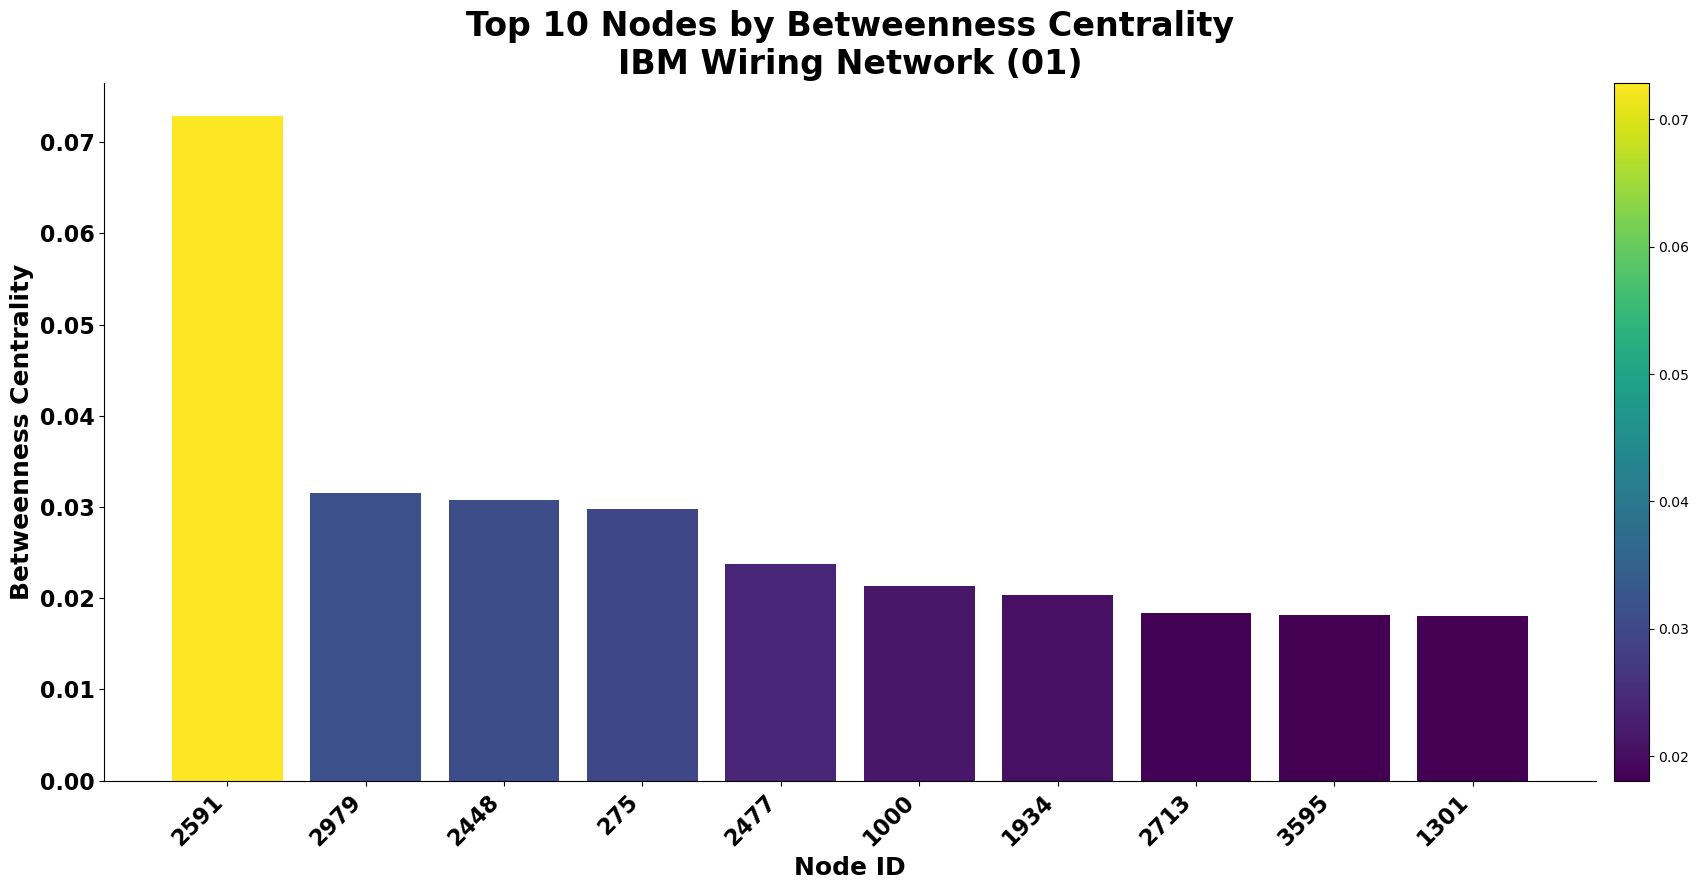

In [160]:
# plot the top 10 nodes by betweenness centrality with inferno colormap
plt.figure(figsize=(19, 9))
x_positions = range(len(df))

# Normalize betweenness values for colormap
import matplotlib.cm as cm
import numpy as np

betw_values = df["betweenness"].values
norm = plt.Normalize(vmin=min(betw_values), vmax=max(betw_values))
# Updated colormap usage per Matplotlib 3.7+ deprecation warning
cmap = plt.colormaps["viridis"]

colors = cmap(norm(betw_values))
bars = plt.bar(x_positions, betw_values, color=colors)

plt.xlabel("Node ID", fontsize=18, weight=600)
plt.ylabel("Betweenness Centrality", fontsize=18, weight=600)
plt.title("Top 10 Nodes by Betweenness Centrality\nIBM Wiring Network (01)", fontsize=24, weight=800, y=1)

plt.xticks(x_positions, df["id"], rotation=45, ha='right', fontsize=16, weight=600)
plt.yticks(fontsize=16, weight=600)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

# Add a colorbar to show mapping of color to betweenness value
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, pad=0.01)

plt.show()

In [124]:
# check network cohesion
def calc_cohesion(Graph):
    # Get the largest (giant) component as a subgraph of the input Graph
    # For directed graphs, use weakly connected components to ignore edge direction 
    if Graph.is_directed():
        largest_cc = max(nx.weakly_connected_components(Graph), key=len)
    else:
        largest_cc = max(nx.connected_components(Graph), key=len)
    Graph = Graph.subgraph(largest_cc).copy()
    # Calculate the average shortest path length
    avg_shortest_path = nx.average_shortest_path_length(Graph.to_undirected())
    
    # Calculate the average clustering coefficient
    avg_clustering = nx.average_clustering(Graph)
    
    return avg_shortest_path, avg_clustering

In [125]:
full_net_avg_shortest_path, full_net_avg_clustering = calc_cohesion(G)
print(f"Full network average shortest path: {full_net_avg_shortest_path}")
print(f"Full network average clustering coefficient: {full_net_avg_clustering}")


Full network average shortest path: 4.462308659931124
Full network average clustering coefficient: 0.2820786603186684


In [129]:
# community detection using the networkx implementation of the Louvain method using the giant component

# If G is directed, switch to its largest weakly connected component, else largest connected component
if G.is_directed():
    largest_cc = max(nx.weakly_connected_components(G), key=len)
else:
    largest_cc = max(nx.connected_components(G), key=len)

G_gc = G.subgraph(largest_cc).copy()  # Work with a copy of the giant component

# Convert to undirected graph for Louvain (must be undirected)
G_undirected = G_gc.to_undirected()

# Perform community detection using Louvain
communities = nx.community.louvain_communities(G_undirected)

# Assign each node to its community as an attribute
community_assignments = {}
for i, community in enumerate(communities):
    for node in community:
        community_assignments[node] = i
nx.set_node_attributes(G_gc, community_assignments, 'community')

# (Optional) Build community-graph: nodes = communities, edges = if they are connected in original G
community_graph = nx.Graph()
community_graph.add_nodes_from(range(len(communities)))
# Add edges between communities if an edge connects their nodes in G_undirected
# (more meaningful than set intersection, which is always zero for non-overlapping communities)
for u, v in G_undirected.edges():
    cu = community_assignments[u]
    cv = community_assignments[v]
    if cu != cv:
        community_graph.add_edge(cu, cv)

# Calculate the average shortest path length in the community graph, if connected
if nx.is_connected(community_graph) and community_graph.number_of_nodes() > 1:
    community_avg_shortest_path = nx.average_shortest_path_length(community_graph)
else:
    community_avg_shortest_path = None

# Calculate the average clustering coefficient in the community graph
if community_graph.number_of_nodes() > 0:
    community_avg_clustering = nx.average_clustering(community_graph)
else:
    community_avg_clustering = None


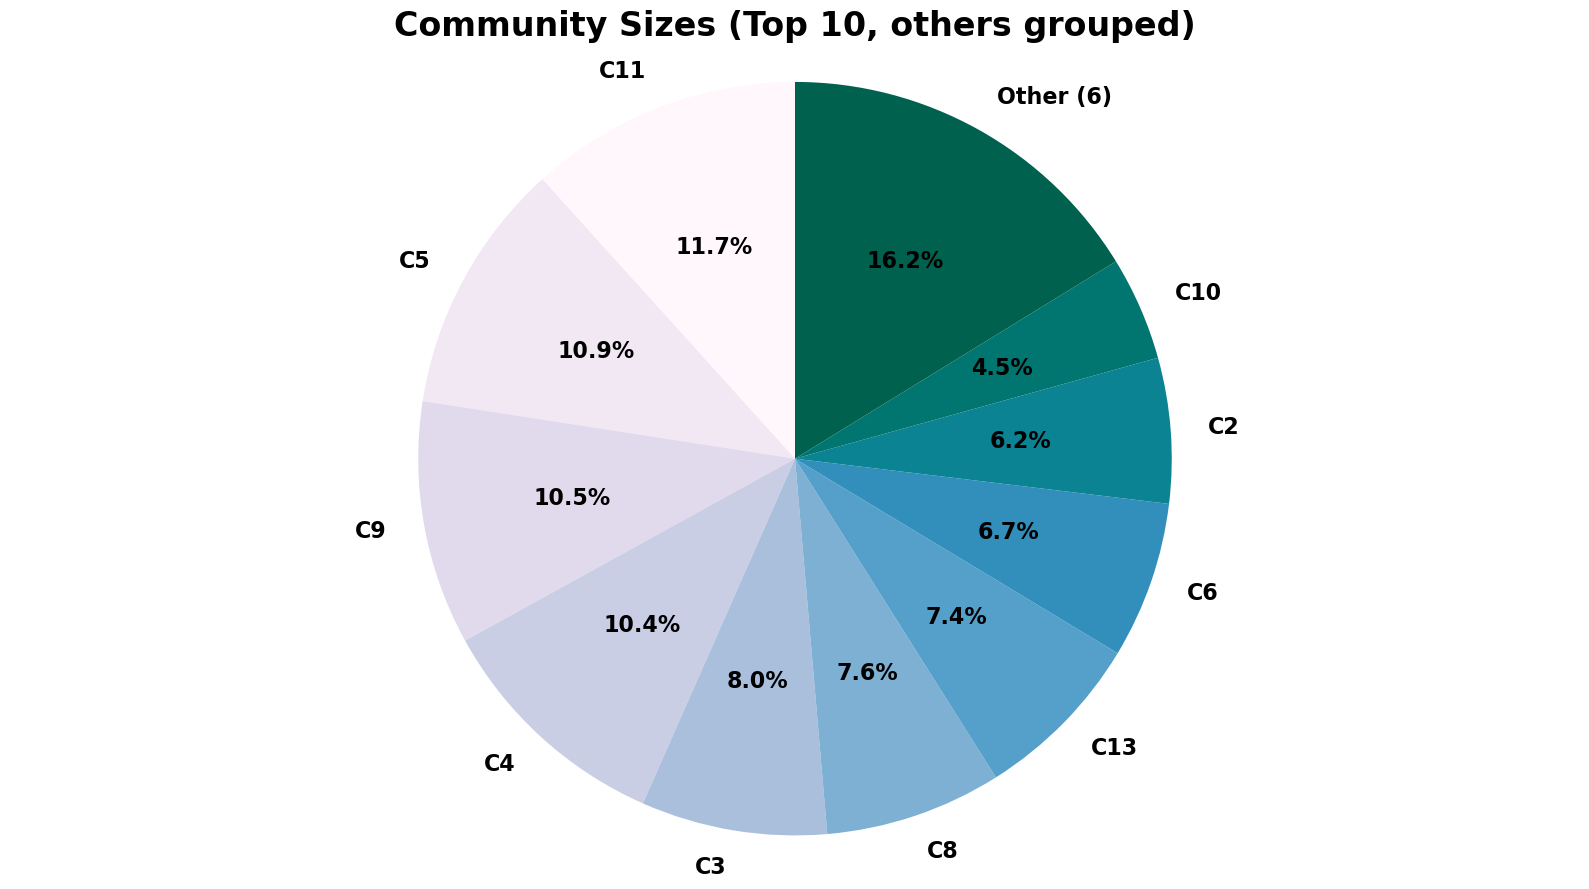

In [151]:
# Plot pie chart of top 10 community sizes; remaining as "Other (N)"

import matplotlib.pyplot as plt

# Calculate sizes and sort communities by size
community_sizes = [len(comm) for comm in communities]
community_indices = list(range(len(communities)))
sorted_communities = sorted(zip(community_indices, community_sizes), key=lambda x: x[1], reverse=True)

top_n = 10
top_communities = sorted_communities[:top_n]
other_communities = sorted_communities[top_n:]

top_labels = [f"C{i}" for i, _ in top_communities]
top_sizes = [size for _, size in top_communities]

other_total = sum(size for _, size in other_communities)
num_other = len(other_communities)

if num_other > 0:
    labels = top_labels + [f"Other ({num_other})"]
    sizes = top_sizes + [other_total]
else:
    labels = top_labels
    sizes = top_sizes

num_pies = len(labels)
cmap = plt.get_cmap('PuBuGn')
colors = [cmap(i / num_pies) for i in range(num_pies)]

plt.figure(figsize=(16, 9))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 16, 'weight': 600}
)
plt.title(f"Community Sizes (Top 10, others grouped)", fontsize=24, weight=800, y=1)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [130]:
print(f"Community average shortest path: {community_avg_shortest_path}")
print(f"Community average clustering coefficient: {community_avg_clustering}")


Community average shortest path: 1.4166666666666667
Community average clustering coefficient: 0.8308778027528028


## Findings from Community Detection:
- The Louvain method identified several distinct communities within the giant component of the network.
- The community graph, where each node is a community and edges represent inter-community connections, was constructed to analyze higher-level network structure.
- The calculated average shortest path length and clustering coefficient provide insight into how communities are organized and interconnected.
- These metrics show the extent to which communities are cohesive and how efficiently information can travel between different communities in the network.

Fairly high chance of communities forming close triangles, and they are quite well-connected to eachother

In [132]:
# ratio of giant component to full network
largest_gc_ratio = len(largest_cc) / G.number_of_nodes()
print(f"Largest component to full network ratio: {largest_gc_ratio}")


Largest component to full network ratio: 0.999261811023622


In [135]:
import numpy as np

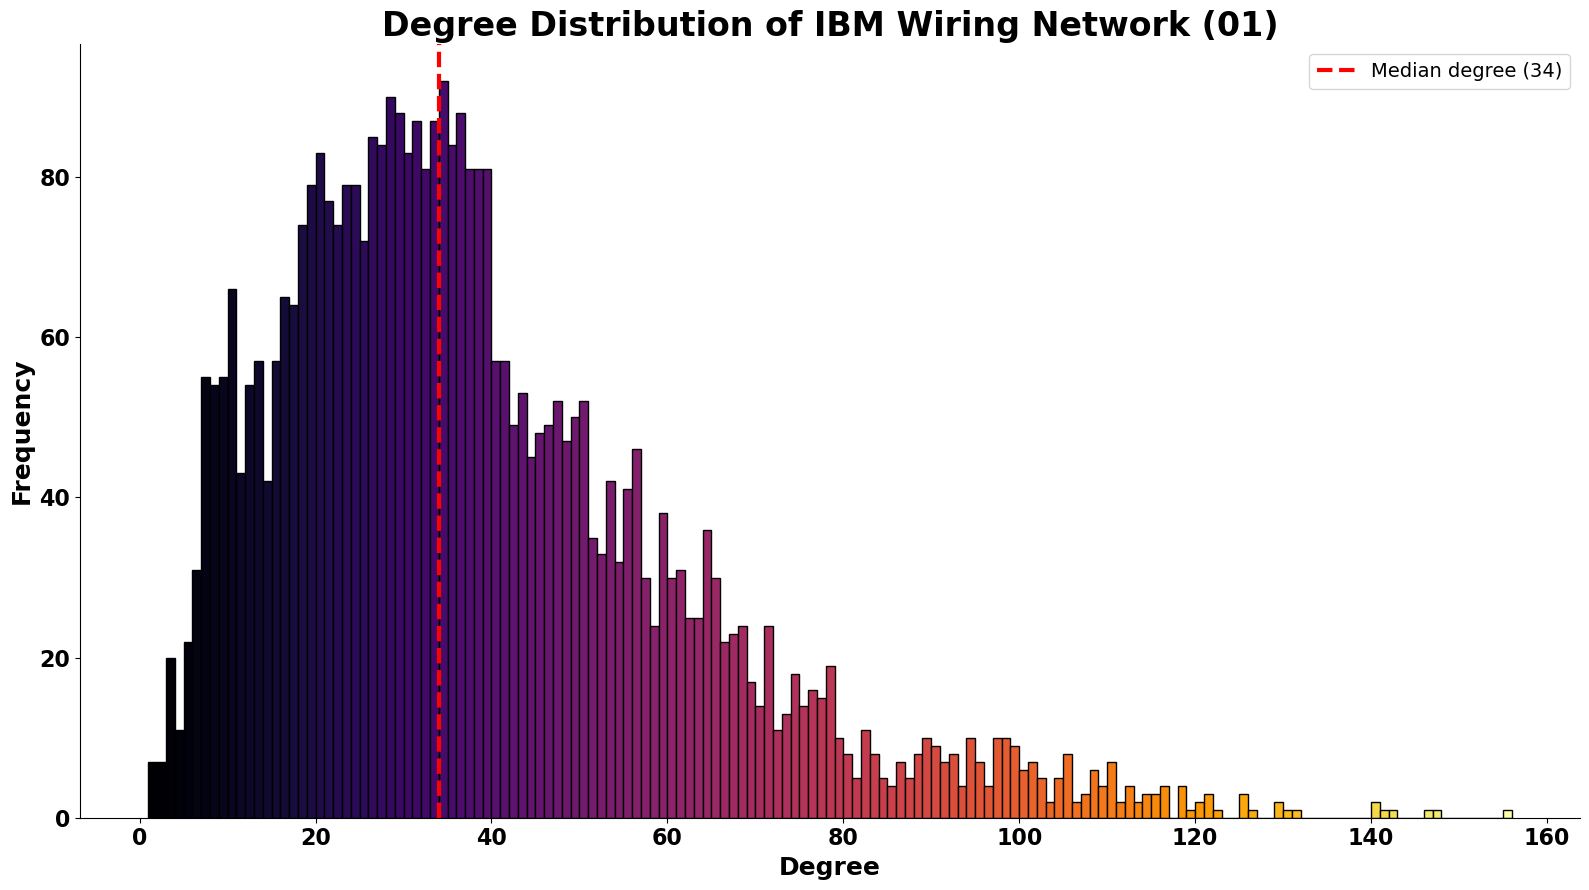

In [145]:
# degree distribution with gradient colormap
import matplotlib as mpl

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure(figsize=(16, 9))

# Compute histogram data without plotting
counts, bins = np.histogram(degree_sequence, bins=range(1, max(degree_sequence)+2))

# Normalize bin indices for color mapping
norm = mpl.colors.Normalize(vmin=0, vmax=len(counts)-1)
cmap = plt.get_cmap('inferno')

# Draw bars manually with gradient colors
ax = plt.gca()
for i in range(len(counts)):
    color = cmap(norm(i))
    ax.bar(bins[i], counts[i], width=1, align='edge', color=color, edgecolor='black')

# Calculate and plot the median degree as a vertical red dashed line with legend
median_degree = int(np.median(degree_sequence))
median_handle = ax.axvline(
    x=median_degree,
    color='red',
    linewidth=3,
    linestyle='--',
    label=f'Median degree ({median_degree})'
)

plt.title("Degree Distribution of IBM Wiring Network (01)", fontsize=24, weight=800, y=1)
plt.xlabel("Degree", fontsize=18, weight=600)
plt.ylabel("Frequency", fontsize=18, weight=600)
plt.xticks(fontsize=16, weight=600)
plt.yticks(fontsize=16, weight=600)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right', fontsize=14)
plt.tight_layout()